<a href="https://colab.research.google.com/github/Otaboyev0727/Amalyotlar/blob/main/AirTicket_price_prediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AirTicket price prediction**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
train = pd.read_csv("/content/train_data.csv", index_col='id')
test = pd.read_csv('/content/test_data.csv', index_col='id')
solution = pd.read_csv("/content/sample_solution.csv")
train.head()


airline   flight source_city departure_time stops arrival_time  \
id                                                                    
1    Vistara   UK-810   Bangalore  Early_Morning   one        Night   
2   SpiceJet  SG-5094   Hyderabad        Evening  zero        Night   
3    Vistara   UK-846   Bangalore        Morning   one      Evening   
4    Vistara   UK-706     Kolkata        Morning   one      Evening   
5     Indigo  6E-5394     Chennai  Early_Morning  zero      Morning   

   destination_city     class  duration  days_left  price  
id                                                         
1            Mumbai   Economy     14.25         21   7212  
2           Kolkata   Economy      1.75          7   5292  
3             Delhi  Business      9.58          5  60553  
4         Hyderabad   Economy      6.75         28   5760  
5            Mumbai   Economy      2.00          4  10712

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  object 
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


In [ ]:
train.describe()

duration     days_left          price
count  20000.000000  20000.000000   20000.000000
mean      12.177627     25.924150   20960.281700
std        7.157944     13.624874   22775.459535
min        0.830000      1.000000    1105.000000
25%        6.830000     14.000000    4783.000000
50%       11.250000     26.000000    7425.000000
75%       16.080000     38.000000   42521.000000
max       38.580000     49.000000  114523.000000

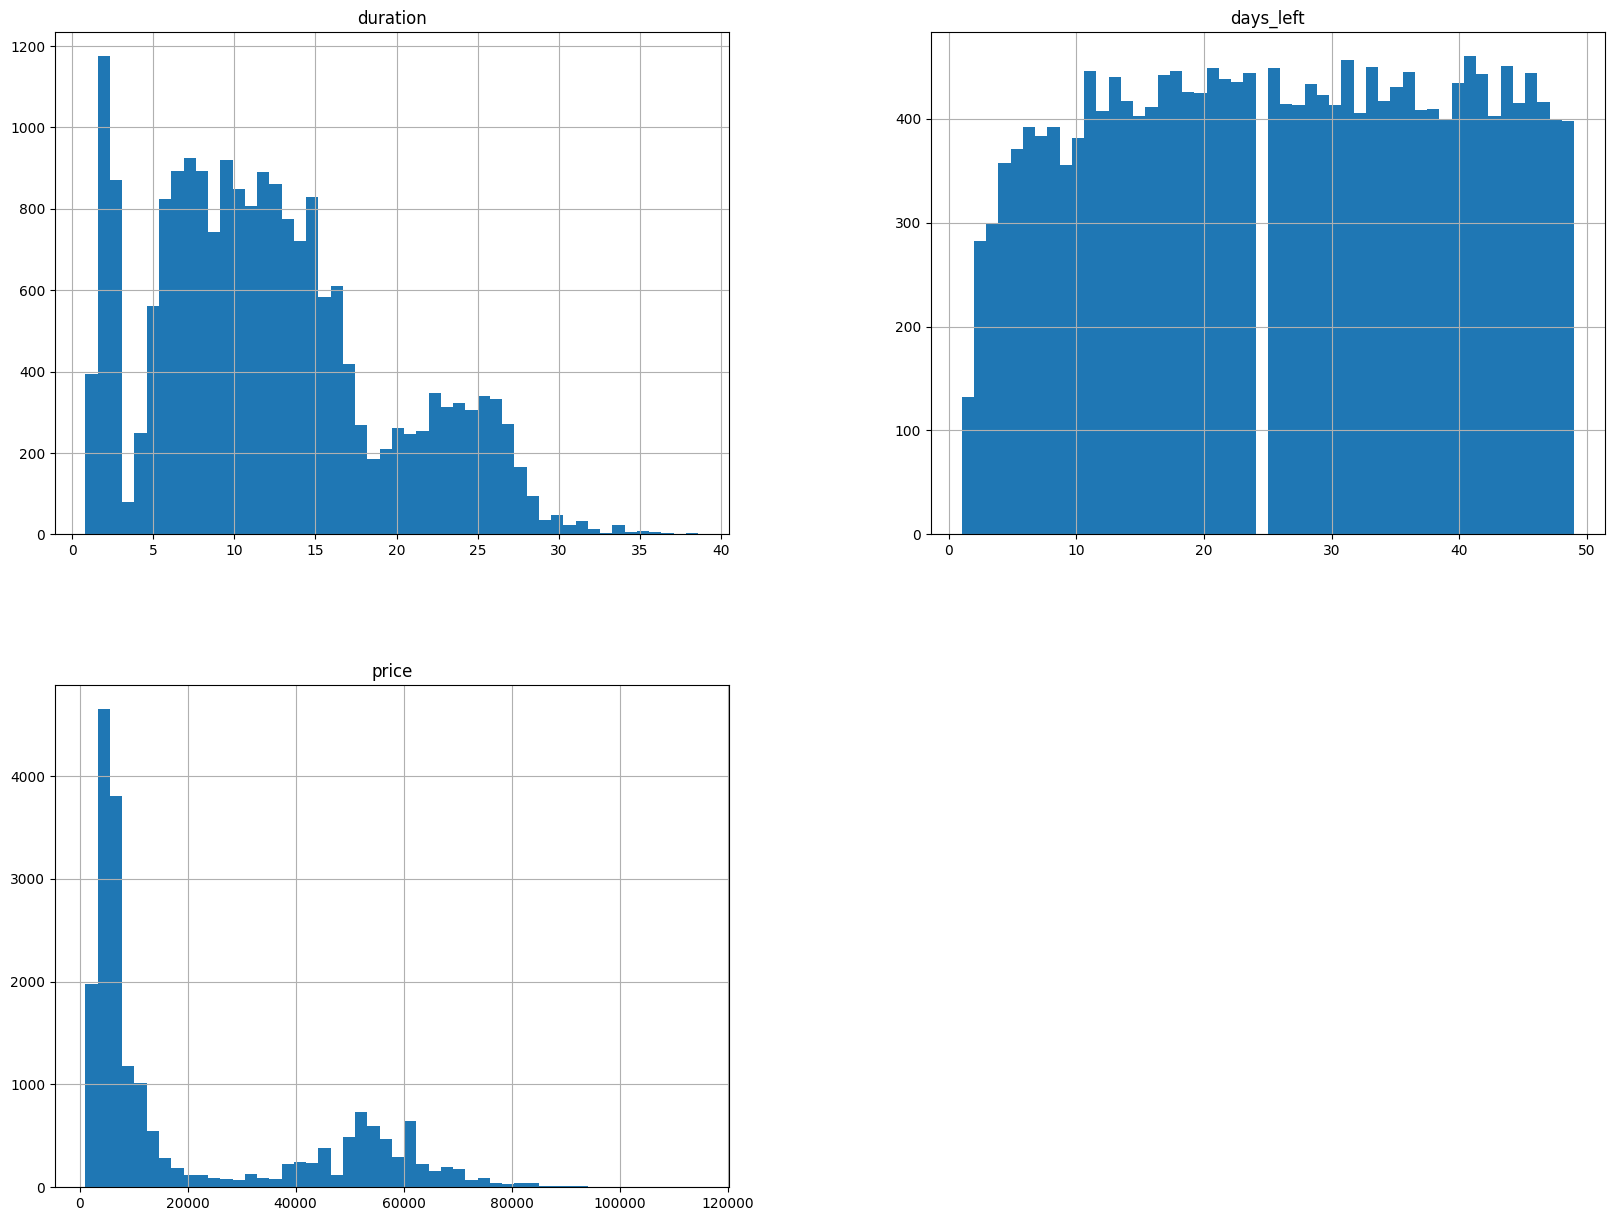

In [ ]:
%matplotlib inline
train.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
train[train['price']>80000]

airline  flight source_city departure_time stops arrival_time  \
id                                                                     
237    Vistara  UK-996      Mumbai        Evening   one      Morning   
587    Vistara  UK-836     Chennai        Morning   one        Night   
659    Vistara  UK-996      Mumbai        Evening   one      Evening   
1065   Vistara  UK-810   Bangalore  Early_Morning   one    Afternoon   
1166   Vistara  UK-772     Kolkata        Morning   one      Evening   
...        ...     ...         ...            ...   ...          ...   
19198  Vistara  UK-834     Chennai        Evening   one      Morning   
19365  Vistara  UK-985       Delhi        Evening   one      Evening   
19492  Vistara  UK-880   Hyderabad      Afternoon   one        Night   
19502  Vistara  UK-944      Mumbai      Afternoon   one        Night   
19620  Vistara  UK-880   Hyderabad      Afternoon   one        Night   

      destination_city     class  duration  days_left   price  
id                                                             
237          Bangalore  Business     16.33         41   85744  
587             Mumbai  Business      9.50          9   80566  
659          Bangalore  Business     22.50          2  114523  
1065            Mumbai  Business      7.00         10   81788  
1166             Delhi  Business      9.33          5   83647  
...                ...       ...       ...        ...     ...  
19198        Hyderabad  Business     16.50          3   84497  
19365          Kolkata  Business     21.08          1   90057  
19492          Chennai  Business      9.67         44   84075  
19502        Bangalore  Business      8.67         17   92772  
19620          Chennai  Business      9.67         45   84075  

[136 rows x 11 columns]

In [ ]:
train[train['duration']>35]

airline   flight source_city departure_time        stops  \
id                                                                  
759    Air_India  AI-9547   Bangalore        Evening  two_or_more   
2308   Air_India  AI-9547   Bangalore        Evening  two_or_more   
2572   Air_India   AI-640   Bangalore  Early_Morning          one   
3420     Vistara   UK-720     Kolkata  Early_Morning          one   
4772   Air_India   AI-440     Chennai  Early_Morning  two_or_more   
5579   Air_India   AI-430     Chennai        Morning          one   
6342   Air_India   AI-569     Chennai  Early_Morning  two_or_more   
6416   Air_India   AI-610   Bangalore        Evening  two_or_more   
8280   Air_India   AI-738   Bangalore        Morning  two_or_more   
8694   Air_India   AI-804   Bangalore  Early_Morning          one   
9101     Vistara   UK-858   Bangalore  Early_Morning          one   
9548   Air_India   AI-440     Chennai  Early_Morning          one   
11994  Air_India   AI-804   Bangalore  Early_Morning          one   
12262  Air_India   AI-806      Mumbai  Early_Morning          one   
15419    Vistara   UK-772     Kolkata        Morning          one   
16146    Vistara   UK-653      Mumbai  Early_Morning          one   
17729  Air_India   AI-559   Hyderabad  Early_Morning          one   
17899  Air_India   AI-806      Mumbai  Early_Morning          one   
19118  Air_India   AI-738   Bangalore        Morning  two_or_more   
19593  Air_India   AI-569     Chennai  Early_Morning          one   
19906  Air_India  AI-9547   Bangalore        Evening  two_or_more   
19998    Vistara   UK-832     Chennai  Early_Morning  two_or_more   

        arrival_time destination_city     class  duration  days_left  price  
id                                                                           
759    Early_Morning          Chennai   Economy     37.00          9  12897  
2308   Early_Morning          Chennai   Economy     37.00         37   5515  
2572         Evening          Chennai   Economy     36.25          2  14002  
3420         Evening        Bangalore  Business     35.08         20  67710  
4772           Night          Kolkata   Economy     37.92          8  15065  
5579           Night           Mumbai   Economy     35.33         46   5778  
6342         Evening        Bangalore   Economy     35.58          3  14126  
6416   Early_Morning          Chennai   Economy     36.83         10  13264  
8280           Night        Hyderabad   Economy     35.75         38   8526  
8694         Evening        Hyderabad   Economy     35.42         37  10090  
9101         Evening            Delhi   Economy     37.25          3  20711  
9548           Night           Mumbai   Economy     38.58         38   6293  
11994        Evening        Hyderabad   Economy     35.42         49  10090  
12262          Night          Kolkata   Economy     36.08          8  12007  
15419          Night            Delhi   Economy     35.17          1  19201  
16146        Evening          Kolkata  Business     37.58          6  72338  
17729        Evening          Kolkata   Economy     35.08         40   6312  
17899          Night          Kolkata   Economy     36.08          2  13361  
19118          Night        Hyderabad   Economy     35.75         31   6843  
19593          Night            Delhi   Economy     38.33          9  13107  
19906  Early_Morning          Chennai   Economy     37.00         14   8644  
19998        Evening        Bangalore   Economy     35.33         17  14822

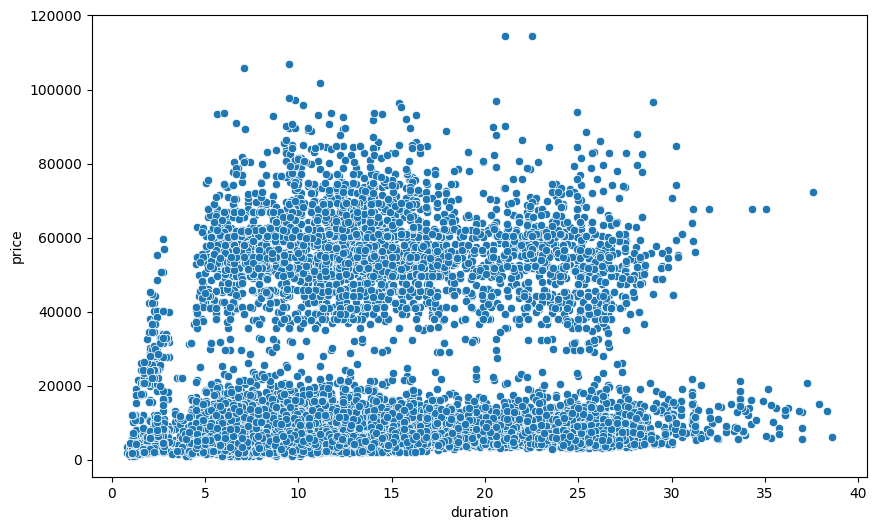

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=train,x=train["duration"],y=train.price)
plt.show()

In [ ]:
train.drop(train[train['price']>85000].index,inplace=True)

In [ ]:
train.drop(train[train['duration']>35].index,inplace=True)

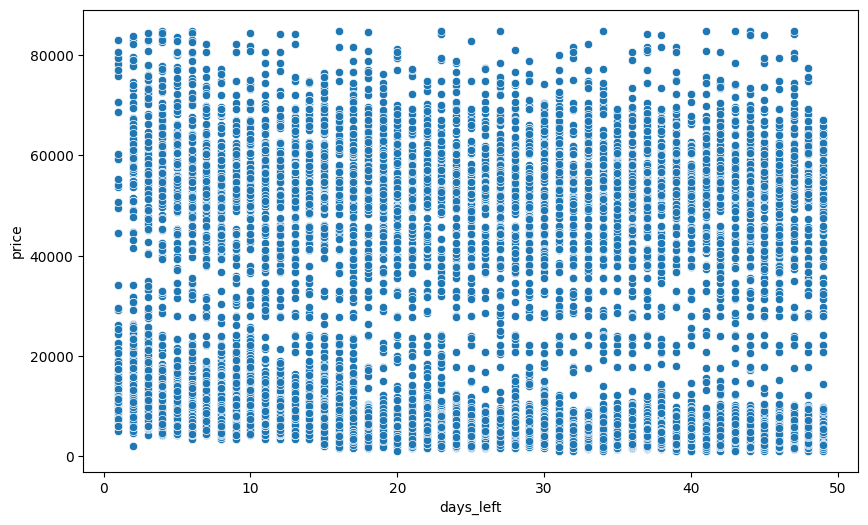

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=train,x=train["days_left"],y=train.price)
plt.show()

<ipython-input-87-34a41afcf36a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['price'])


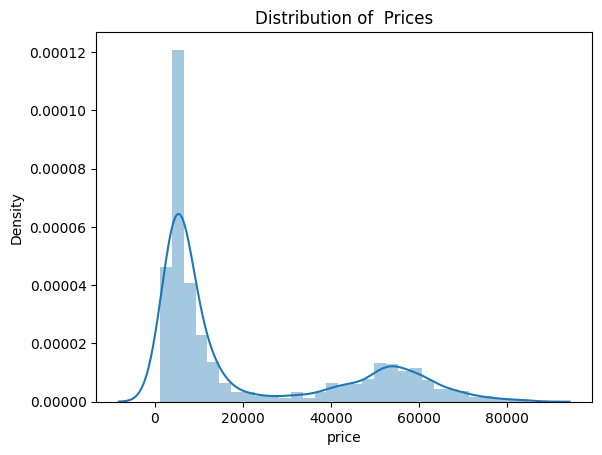

In [ ]:
sns.distplot(train['price'])
plt.title('Distribution of  Prices')
plt.show()

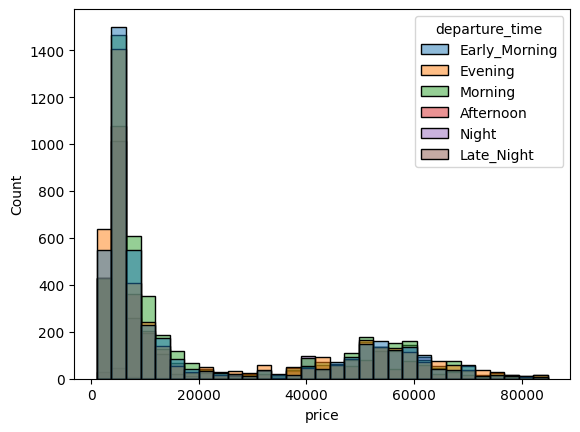

In [ ]:
sns.histplot(data=train,x='price',hue='departure_time')
plt.show()

In [ ]:
train.corrwith(train['price']).sort_values(ascending=False)

<ipython-input-10-72ccbf260314>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corrwith(train['price']).sort_values(ascending=False)


price        1.000000
duration     0.215982
days_left   -0.096951
dtype: float64

In [ ]:
X = train.drop('price', axis=1)
y =np.asanyarray(train[['price']])
     

In [ ]:
X_text = train.drop(['duration', 'days_left', 'price', 'flight'], axis=1)
X_num = train[['duration', 'days_left']]
X_text.head()

airline source_city departure_time stops arrival_time destination_city  \
id                                                                            
1    Vistara   Bangalore  Early_Morning   one        Night           Mumbai   
2   SpiceJet   Hyderabad        Evening  zero        Night          Kolkata   
3    Vistara   Bangalore        Morning   one      Evening            Delhi   
4    Vistara     Kolkata        Morning   one      Evening        Hyderabad   
5     Indigo     Chennai  Early_Morning  zero      Morning           Mumbai   

       class  
id            
1    Economy  
2    Economy  
3   Business  
4    Economy  
5    Economy

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([('std_scaler', StandardScaler())])

num_attribs = list(X_num)
text_attribs = list(X_text)

full_pip = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('text', OneHotEncoder(), text_attribs)
])

x= full_pip.fit_transform(X)


     

In [ ]:

from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

LR_model.fit(x, y)

LinearRegression()

In [ ]:
lr_predict=LR_model.predict(x)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(lr_predict,y)
error=np.sqrt(mse)
print(f"MSE: {error.round()}")
     

MSE: 6456.0


In [ ]:

RF_model = RandomForestRegressor()
RF_model.fit(x, y)

<ipython-input-12-f60ccc4bca53>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(x, y)


RandomForestRegressor()

In [ ]:
rf_predict=RF_model.predict(x)

mse=mean_squared_error(rf_predict,y)
error=np.sqrt(mse)
print(f"MSE: {error.round()}")

MSE: 1289.0


In [ ]:
def display_scores(scores):
  print("Scores:", scores.round())
  print("Mean:", scores.mean().round())
  print("Std.dev:", scores.std().round())

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RF_model, x, y, scoring="neg_mean_squared_error", cv=5)
RF_rmse_scores = np.sqrt(-scores)

display_scores(RF_rmse_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Scores: [3555. 3514. 3499. 3662. 3628.]
Mean: 3571.0
Std.dev: 64.0


In [ ]:
x_test=full_pip.fit_transform(test)

In [ ]:
y_test_predicted = RF_model.predict(x_test)
y_test_predicted

array([53282.76, 53596.2 , 22735.44, ..., 50278.86, 48642.75, 66666.57])

In [ ]:
solution['price'] = y_test_predicted
solution

id     price
0        1  53282.76
1        2  53596.20
2        3  22735.44
3        4   2620.45
4        5   5990.51
...    ...       ...
4995  4996  59449.31
4996  4997   4471.75
4997  4998  50278.86
4998  4999  48642.75
4999  5000  66666.57

[5000 rows x 2 columns]

In [ ]:

solution.to_csv('Airticket_price_solution.csv',index=False)